In [1]:
import pandas as pd

In [2]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

c:\Users\carre\anaconda3\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sellin = pd.read_csv("../../datasets/sell-in.txt.gz", sep="\t")
#df = df[df["cat1"] != "REF"]
sellin

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.05300,0.05300
1,201701,10032,20524,0,1,0.13628,0.13628
2,201701,10217,20524,0,1,0.03028,0.03028
3,201701,10125,20524,0,1,0.02271,0.02271
4,201701,10012,20524,0,11,1.54452,1.54452
...,...,...,...,...,...,...,...
2945813,201912,10105,20853,0,1,0.02230,0.02230
2945814,201912,10092,20853,0,1,0.00669,0.00669
2945815,201912,10006,20853,0,7,0.02898,0.02898
2945816,201912,10018,20853,0,4,0.01561,0.01561


In [33]:
df_series = sellin.query("periodo <= 201910")
df_series = pd.pivot_table(df_series,index=["periodo",],columns=["product_id"],values=["tn"],aggfunc="sum",fill_value=0)
df_series.reset_index(inplace=True)
df_series.columns = df_series.columns.map(lambda x: x[1] if x[0] == "tn" else x[0])
df_series.iloc[:, 1:-1] = df_series.iloc[:, 1:-1].div(df_series.iloc[:, 1:-1].sum(axis=1), axis=0) * 100
df_series

,periodo,20001,20002,20003,20004,20005,20006,20007,20008,20009,...,21290,21291,21292,21293,21294,21295,21296,21297,21298,21299
0,201701,2.744703,1.615386,3.122555,1.632296,1.451289,1.551531,1.364380,1.535782,1.110134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000017,0.000000,0.00000
1,201702,2.308497,1.463425,2.175715,1.470119,1.595175,1.733322,1.847425,1.827419,1.374777,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,201703,2.830888,1.813042,1.992080,1.064090,1.224788,1.886035,1.826286,2.036081,0.990588,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,201704,2.700182,1.318225,1.326988,1.292233,1.672130,1.426654,1.870440,1.581096,0.854799,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,201705,3.295773,1.850471,1.361314,1.192126,1.131179,1.784078,1.882518,1.863749,0.999067,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,201706,3.388971,2.158498,1.658938,1.316531,1.178484,1.556894,1.896755,1.648134,1.222924,...,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,201707,2.791248,2.289475,2.126255,1.543339,1.694911,1.816584,2.077815,1.526964,1.100923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,201708,3.152223,1.541325,2.149458,2.592946,2.656341,1.943501,2.175943,2.082553,1.022409,...,0.000020,0.000027,0.000024,0.000023,0.000019,0.000000,0.000016,0.000000,0.000014,0.00546
8,201709,2.747378,2.222495,3.057983,2.627839,2.603312,1.250180,1.902826,1.400340,0.969455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,201710,2.893964,1.723513,3.936858,2.549155,1.759053,1.742689,1.834908,1.453646,0.536118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


<Axes: title={'center': 'Sell-in share of product'}>

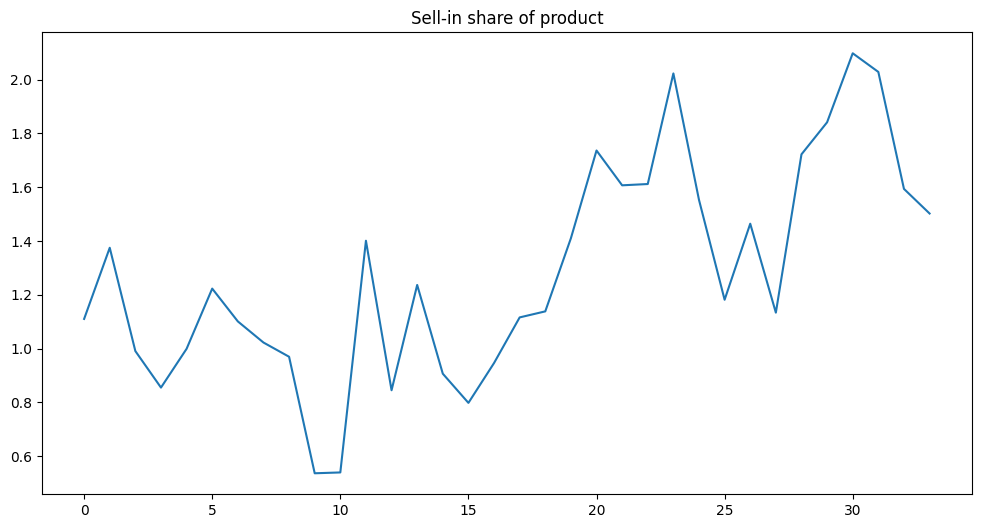

In [34]:
df_series[20009].plot(kind="line", figsize=(12, 6), title="Sell-in share of product")

In [7]:
df_total = sellin.groupby("periodo")["tn"].sum().reset_index()
df_total.columns = ["periodo", "total_tn"]
df_total["periodo"] = pd.to_datetime(df_total["periodo"], format="%Y%m") + pd.offsets.MonthEnd(0)
df_total = df_total.sort_values(by='periodo')
df_total.set_index("periodo", inplace=True)
df_total = df_total.fillna(0)
# dfs = dfs.sort_values(by='periodo')
# dfs.set_index('periodo', inplace=True)
# dfs = dfs.fillna(0)


# 
df_total.head(3)

,total_tn
periodo,
2017-01-31,34057.31784
2017-02-28,34568.65311
2017-03-31,46040.59636


In [35]:
# Convertir periodo a datetime si no lo está
df_series['periodo'] = pd.to_datetime(df_series['periodo'], format='%Y%m')

In [36]:


# 2. Transformar a formato largo (necesario para AutoGluon)
long_df = df_series.melt(
    id_vars='periodo', 
    var_name='product_id', 
    value_name='tn'
)
long_df['product_id'] = long_df['product_id'].astype(int)  # Asegurarse de que product_id sea string

In [37]:
# 3. Crear TimeSeriesDataFrame
# AutoGluon necesita: series_id, timestamp, target
train_data = TimeSeriesDataFrame.from_data_frame(
    long_df,
    id_column="product_id",  # Cada producto es una serie separada
    timestamp_column="periodo",
   # target="tn"  # La variable a predecir (unidades vendidas)
)

In [38]:
train_data

tn
item_id timestamp           
20001   2017-01-01  2.744703
        2017-02-01  2.308497
        2017-03-01  2.830888
        2017-04-01  2.700182
        2017-05-01  3.295773
...                      ...
21299   2019-06-01  0.000000
        2019-07-01  0.000000
        2019-08-01  0.000000
        2019-09-01  0.000000
        2019-10-01  0.000000

[41786 rows x 1 columns]

In [39]:
# 4. Configurar y entrenar el predictor
predictor = TimeSeriesPredictor(
    prediction_length=2,
    target="tn",
    eval_metric="MAPE",
    path="autogluon_pronostico_productos",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=3600,
)

Beginning AutoGluon training... Time limit = 3600s
AutoGluon will save models to 'd:\Francisco\labo3-2025v\FRANCISCO\notebooks\total_ponderado\autogluon_pronostico_productos'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       6.58 GB / 15.95 GB (41.3%)
Disk Space Avail:   525.86 GB / 931.50 GB (56.5%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MAPE,
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 2,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'tn',
 'time_limit': 3600,
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided trai

In [40]:
# 5. Generar pronósticos
predictions = predictor.predict(train_data)

Model not specified in predict, will default to the model with the best validation score: Naive


In [61]:
pred = predictions.query("timestamp == '2019-12-01'").reset_index()[["item_id","mean"]]
pred.loc[pred["mean"] <0, "mean"] = 0

C:\Users\carre\AppData\Local\Temp\ipykernel_3416\629601748.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  pred = predictions.query("timestamp == '2019-12-01'").reset_index()[["item_id","mean"]]


In [60]:
sellin = pd.read_csv("../../datasets/sell-in.txt.gz", sep="\t")
dic = sellin.query("periodo == 201912")
dic = dic.groupby("product_id")["tn"].sum().reset_index()
dic

,product_id,tn
0,20001,1504.68856
1,20002,1087.30855
2,20003,892.50129
3,20004,637.90002
4,20005,593.24443
...,...,...
922,21265,0.05007
923,21266,0.05121
924,21267,0.01569
925,21271,0.00298


In [62]:
total_diciembre = dic["tn"].sum()
pred["ypred"] = pred["mean"] * total_diciembre / 100
pred.rename(columns={"item_id": "product_id"}, inplace=True)
pred = pred.merge(dic[["product_id", "tn"]], on="product_id", how="left")
pred


,product_id,mean,ypred,tn
0,20001,4.217713,1105.760578,1504.68856
1,20002,5.346837,1401.783875,1087.30855
2,20003,2.920831,765.756109,892.50129
3,20004,2.875804,753.951372,637.90002
4,20005,2.692365,705.859221,593.24443
...,...,...,...,...
1224,21295,0.000000,0.000000,NaN
1225,21296,0.000000,0.000000,NaN
1226,21297,0.000000,0.000000,NaN
1227,21298,0.000000,0.000000,NaN


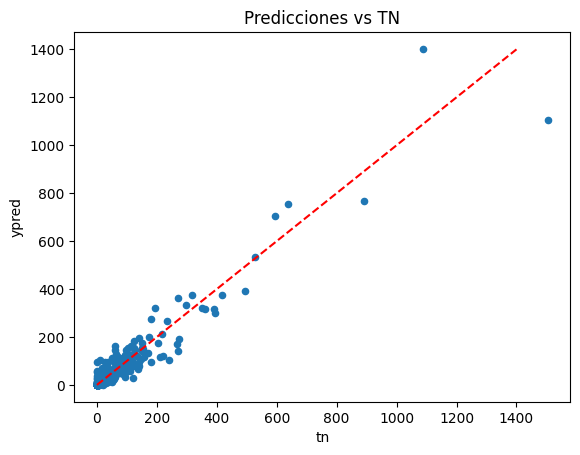

In [65]:
import matplotlib.pyplot as plt
pred = pd.DataFrame(pred)
pred.plot(kind="scatter", x="tn", y="ypred", title="Predicciones vs TN")
plt.plot([0, 1400], [0, 1400], 'r--')
plt.show()

In [66]:
numerador = (pred["tn"]- pred["ypred"]).abs().sum()
denominador = pred["tn"].sum()
porcentaje_error = (numerador / denominador)
porcentaje_error

np.float64(0.3007439515692484)